In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("Electricity consumption data1.csv")

# Success - Display the first record
display(data.head(n=10))



,Time,101,102,103,104,105,106,107,108,109,...,G107,G201,G202,G203,G204,G205,G206,L01,L02,L03
0,3/9/17 0:15,0.032495,0.009251,0.095979,0.044066,0.100381,0.022366,0.000000,0.000000,0.000000,...,0.000000,0.121009,0.031823,0.007708,0.012072,0.033362,0.015401,0.031097,0.111672,0.014283
1,3/9/17 0:30,0.023237,0.000000,0.145151,0.050406,0.103405,0.022247,0.238013,0.027899,0.022561,...,0.059148,0.193855,0.028488,0.019160,0.012020,0.039178,0.022247,0.014525,0.113605,0.030250
2,3/9/17 0:45,0.003944,0.000000,0.033638,0.035806,0.091992,0.021876,0.088026,0.032538,0.037091,...,0.031634,0.186336,0.006495,0.020231,0.032462,0.018621,0.023054,0.002017,0.142660,0.029992
3,3/9/17 1:00,0.003916,0.000000,0.063950,0.015116,0.070523,0.028180,0.091835,0.022470,0.036161,...,0.025087,0.178300,0.000000,0.000000,0.012096,0.000252,0.045473,0.002042,0.123375,0.029964
4,3/9/17 1:15,0.003437,0.030267,0.038095,0.010192,0.070731,0.052562,0.138126,0.003847,0.024330,...,0.034970,0.149255,0.000000,0.000000,0.012000,0.007086,0.024990,0.001987,0.050266,0.039041
5,3/9/17 1:30,0.003387,0.014311,0.031948,0.015815,0.070046,0.049993,0.145270,0.003272,0.007074,...,0.033774,0.122747,0.000000,0.000000,0.026384,0.005695,0.022067,0.008289,0.021944,0.052320
6,3/9/17 1:45,0.007943,0.000000,0.006382,0.018270,0.079829,0.025530,0.046058,0.003592,0.007697,...,0.007015,0.113867,0.000000,0.025933,0.017796,0.000139,0.067238,0.033033,0.019712,0.029361
7,3/9/17 2:00,0.032689,0.000000,0.003084,0.047904,0.069507,0.020974,0.000000,0.000000,0.000000,...,0.000000,0.032465,0.025642,0.013639,0.012027,0.018327,0.082619,0.030148,0.019721,0.029018
8,3/9/17 2:15,0.030313,0.000000,0.002879,0.038037,0.078436,0.021077,0.053482,0.007723,0.015901,...,0.019125,0.013124,0.029072,0.000000,0.018378,0.036668,0.087914,0.004409,0.020103,0.029099
9,3/9/17 2:30,0.008992,0.022086,0.002703,0.034984,0.083832,0.020966,0.006678,0.007150,0.014631,...,0.020979,0.021224,0.011921,0.008540,0.025838,0.030973,0.095459,0.002005,0.034336,0.029485


# Plotting Data

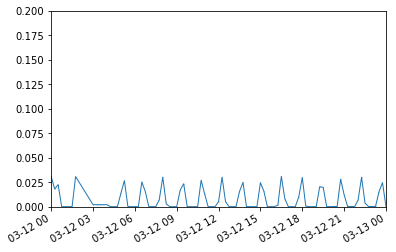

In [4]:
import matplotlib.pyplot as plt
import csv
import datetime


Y = data['102']
date = data['Time']
fig, ax = plt.subplots()

ax.plot_date(date[:3000],Y[:3000],markersize=.1,linewidth=1, linestyle="-")
plt.gcf().autofmt_xdate()
ax.set_xlim([datetime.date(2017, 3, 12), datetime.date(2017, 3, 13)])
ax.set_ylim([0, 0.20])
#plt.rcParams["figure.figsize"] = [20,9]

plt.show()


# Average

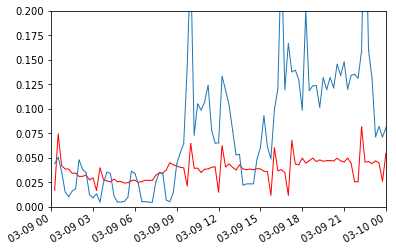

In [5]:
average = []
n_records = len(data)
for i in range(0,100):  
    count = 0
    x = 0
    for key in data:
        if count == 0:
            count = 1 
        else:
            x = x + data[key][i]

    average.append(x/211)
    
fig, ax1 = plt.subplots()

Y = data['104'];
date = data['Time']
ax1.plot_date(date[:100],average[:100],markersize=.1,linewidth=1, linestyle="-", color = 'r')

ax1.plot_date(date[:100],Y[:100],markersize=.1,linewidth=1, linestyle="-")
ax1.set_xlim([datetime.date(2017, 3, 9), datetime.date(2017, 3, 10)])
ax1.set_ylim([0, 0.20])
#plt.rcParams["figure.figsize"] = [20,9]

plt.gcf().autofmt_xdate()

plt.show()

# Predictions

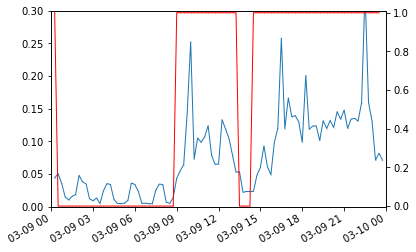

In [6]:

predictions = []
for i in range(1,95):
    total = 0
    
    for j in range(i-1,i+2):
        total = total + Y[j]
    
    if Y[i] > 0.04 and  (total/4) >= 0.03: #if the apartment is using more than 0.04
        predictions.append(1)
    

    elif Y[i] - Y[i-1] > 0.04 or Y[i] - Y[i-1] < -0.04 or Y[i] - Y[i+1] > 0.04 or Y[i] - Y[i+1] < -0.04:
        predictions.append(1)
            
    else:
        predictions.append(0)

fig, ax1 = plt.subplots()

ax1.plot_date(date[:95],Y[:95],markersize=.1,linewidth=1, linestyle="-")
plt.gcf().autofmt_xdate()
ax1.set_xlim([datetime.date(2017, 3, 9), datetime.date(2017, 3, 10)])
ax1.set_ylim([0, 0.30])

ax2 = ax1.twinx()
ax2.plot_date(date[:94],predictions,markersize=.1,linewidth=1, linestyle="-", color = 'r')
ax2.set_xlim([datetime.date(2017, 3, 9), datetime.date(2017, 3, 10)])

ax2.set_ylim([-0.003, 1.01])

#plt.rcParams["figure.figsize"] = [20,9]

plt.show()


# Hourly Data

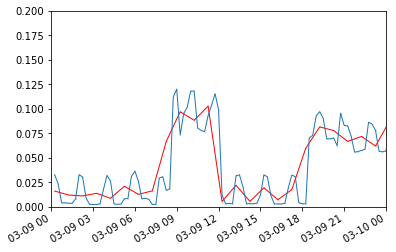

In [7]:
n = n_records
hourly = []
for i in range(0,n,4):
    if i <= (n-4):
        total = data['101'][i] + data['101'][i+1] + data['101'][i+2] + data['101'][i+3]

        hourly.append(total/4)
    else: 
        break
hours = []
for i in range(0,n,4):
    hours.append(data['Time'][i])
    
fig, ax1 = plt.subplots()

    
ax1.plot_date(hours[:1000],hourly[:1000],markersize=.1,linewidth=1, linestyle="-",color = 'r')
ax1.set_ylim([0, 0.20])


ax1.plot_date(date[:3000],data['101'][:3000],markersize=.1,linewidth=1, linestyle="-")
ax1.set_xlim([datetime.date(2017, 3, 9), datetime.date(2017, 3, 10)])
#plt.rcParams["figure.figsize"] = [20,9]

plt.gcf().autofmt_xdate()
plt.show()



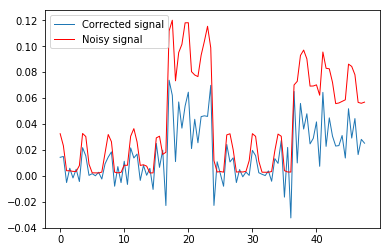

In [8]:
from scipy.signal import butter, filtfilt
import numpy as np
x = 1  # number of days
def butter_highpass(cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=True)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order):
    b, a = butter_highpass(cutoff, fs, order)
    y = filtfilt(b, a, data)
    return y

rawdata = data['101'][:96*x]
signal = rawdata
fs = 2

cutoff = .5


order = 1
conditioned_signal = butter_highpass_filter(signal, cutoff, fs, order)

T = 48*x
nsamples = T * fs
t = np.linspace(0, T, nsamples, endpoint=False)


fig, ax1 = plt.subplots()


ax1.plot(t,conditioned_signal,markersize=.1,linewidth=1, linestyle="-", label='Corrected signal')
ax1.plot(t,rawdata,markersize=.1,linewidth=1, linestyle="-",color = 'r', label='Noisy signal')

#ax1.set_xlim([datetime.date(2017, 3, 9), datetime.date(2017, 3, 10)])
plt.legend(loc='upper left')





In [11]:
count = 0
X = 0

for item in Y:
    count = count + 1
    if count < 120:
        X = X + item * 1.45
    else:
        X = X + item * 7.6
        
print X

7246.07760119


In [10]:
X = 0
for item in Y:
        X = X + item * 9.627
print X
        

9242.90796029
